In [1]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colormaps as cm
from package import saveload

In [2]:
figsize=(12, 5)

In [3]:
def calculate_mean_betty(df: pd.DataFrame, array, dim=None):
    """
    Calculate mean betty numbers
    
    Parameters:
    -----------
    df : DataFrame with columns ['Birth', 'Death', 'Dimension', 'Space']
    
    array : list or np.array
        Array of values
        
    dim : int or None
        Dimension of topological space
        If that's None< that will be maximal dimension from dfs['Dimension']
    
    Returns:
    --------
    res : np.array shape (len(array), dim)
        Array of 
    """
    if dim is None:
        dim = df['Dimension'].max()
    res = np.zeros([len(array), dim])
    for i in range(len(array)):
        val = array[i]
        dfi = df[(df['Birth'] <= val)&(df['Death'] > val)]
        dfi = dfi.groupby(['Space', 'Dimension'], as_index=False).count()[['Space', 'Dimension', 'Birth']]
        dfi = dfi.groupby('Dimension', as_index=False).mean()
        index = dfi['Dimension'].values
        vals = dfi['Birth'].values
        res[i, index] = vals
    return res

In [4]:
def calculate_mean_EC(df: pd.DataFrame, array):
    """
    Calculate mean betty numbers
    
    Parameters:
    -----------
    df : DataFrame with columns ['Birth', 'Death', 'Dimension', 'Space']
    
    array : list or np.array
        Array of values
        
    
    Returns:
    --------
    res : np.array length len(array)
        Array of 
    """
    res = np.zeros(len(array))
    for i in range(len(array)):
        val = array[i]
        dfi = df[(df['Birth'] <= val)&(df['Death'] > val)][['Space', 'Dimension', 'Birth']]
        dfi = dfi.groupby(['Space', 'Dimension'], as_index=False).count()
        dfi.columns = ['Space', 'Dimension', 'Count']
        dfi['Summand EC'] = (-1)**dfi['Dimension'] * dfi['Count']
        dfi = dfi.groupby('Space', as_index=False).sum()['Summand EC']
        res[i] = dfi.mean()
    res[np.isnan(res)] = 0
    return res

# 2-dimensional models

## $PVLM(A_2)$

$A_2 \equiv A_2^*$, but $A_2 \neq A_2^*$

In [31]:
filename_A2 = 'lab-results/lab_hexagonal_tessellation_on_torus2d_modern_aggregated/size{0}.csv'
sizes_A2 = np.arange(3, 129)

dfs_A2 = [pd.read_csv(filename_A2.format(size)) for size in sizes_A2]
dfs_A2 = [df[df['Death'] == np.inf][['Birth', 'Dimension', 'Space']] for df in dfs_A2]
for i in range(len(sizes_A2)):
    dfs_A2[i]['Size'] = sizes_A2[i]
df_A2 = pd.concat(dfs_A2)
df_A2['Number'] = np.tile(np.arange(3), len(df_A2)//3)
df_A2 = df_A2[df_A2['Number'] > 0]

In [23]:
df_A2mean = df_A2.groupby(['Size', 'Number'], as_index=False).mean()
df_A2mean.head()

,Size,Number,Birth,Dimension,Space
0,3,1,0.445161,1.0,49.5
1,3,2,0.581356,1.0,49.5
2,4,1,0.431938,1.0,49.5
3,4,2,0.561923,1.0,49.5
4,5,1,0.431530,1.0,49.5


In [79]:
xticks_A2 = np.arange(3, 129, 12.5) // 1


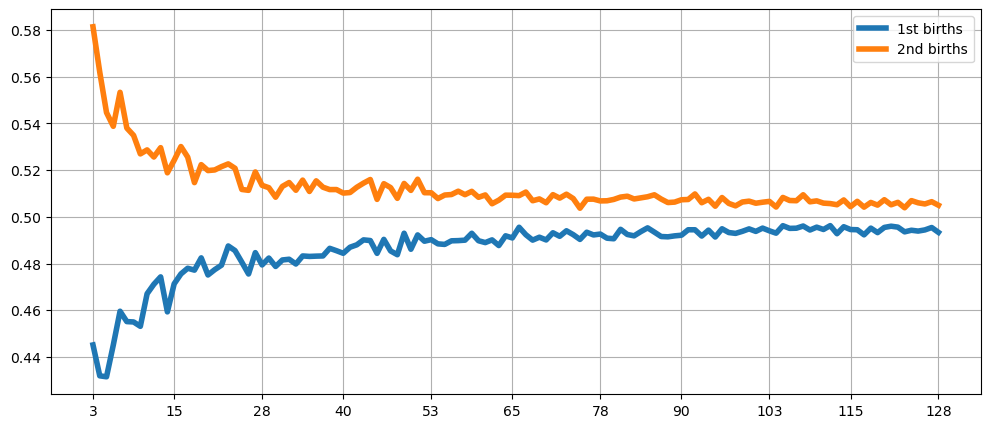

In [80]:
births1_A2 = df_A2mean[df_A2mean['Number'] == 1]['Birth']
births2_A2 = df_A2mean[df_A2mean['Number'] == 2]['Birth']

plt.figure(figsize=figsize)
plt.plot(sizes_A2, births1_A2, linewidth=4, label='1st births')
plt.plot(sizes_A2, births2_A2, linewidth=4, label='2nd births')
plt.legend()
plt.xticks(xticks_A2)
plt.grid(True)

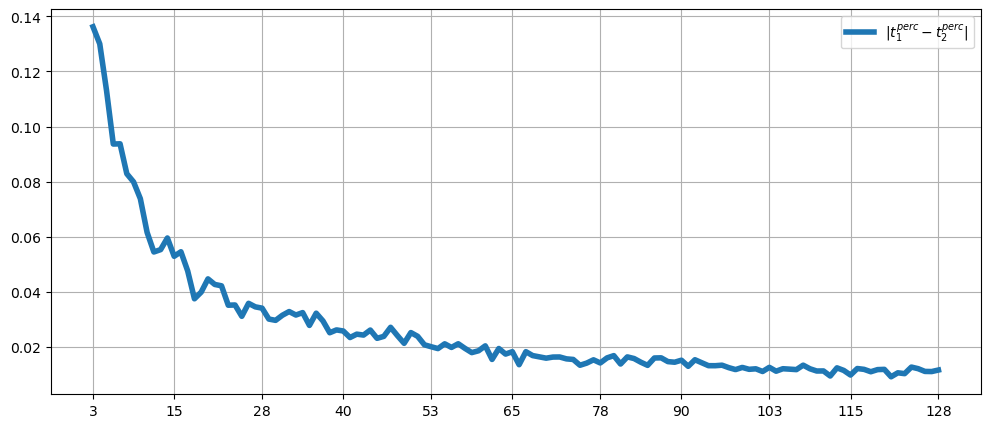

In [81]:
plt.figure(figsize=figsize)
plt.plot(sizes_A2, abs(births1_A2.values - births2_A2.values), linewidth=4, label='$|t_1^{perc} - t_2^{perc}|$')
plt.legend()
plt.xticks(xticks_A2)
plt.grid(True)

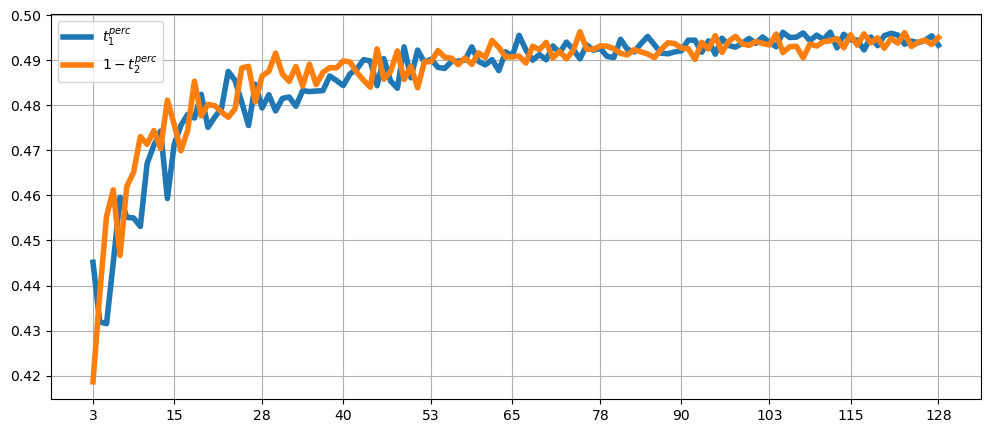

In [82]:
plt.figure(figsize=figsize)
plt.plot(sizes_A2, births1_A2.values, linewidth=4, label='$t_1^{perc}$')
plt.plot(sizes_A2, 1 - births2_A2.values, linewidth=4, label='$1 - t_2^{perc}$')
plt.legend()
plt.xticks(xticks_A2)
plt.grid(True)

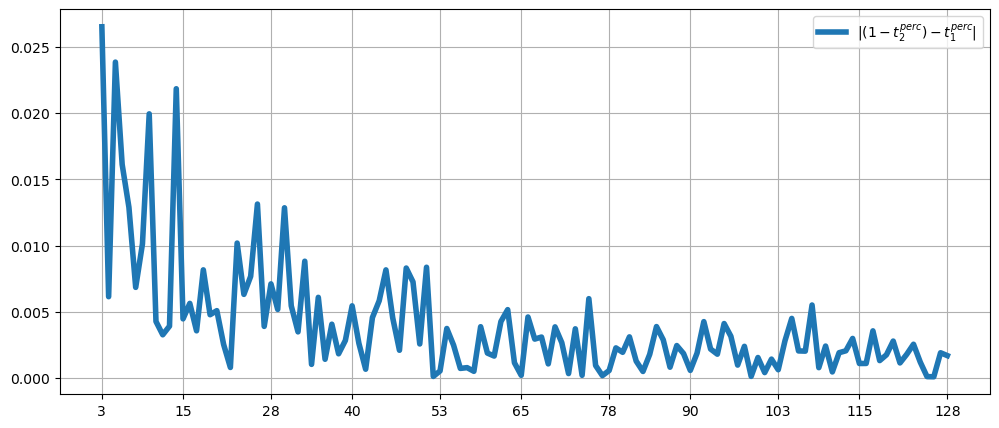

In [84]:
plt.figure(figsize=figsize)
plt.plot(sizes_A2, abs((1 - births2_A2.values) - births1_A2.values), linewidth=4, label='$|(1 - t_2^{perc}) - t_1^{perc}|$')
plt.legend()
plt.xticks(xticks_A2)
plt.grid(True)